### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

### Load Data

In [3]:
df_train = pd.read_csv('train.csv')

### Data Analysis

In [4]:
print(df_train.shape)

(137, 43)


In [6]:
print(df_train.head())

   Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

Train data(df_train) has 10 rows and 43 columns.<br>
Rows includes 137 entries or house sales and Columns includes 41 features + id + revenue(target).

In [6]:
import unicodedata

def unicode_removal(data):
    city_name = ""
    for text in data:
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        city_name += text
    return city_name

In [7]:
df_train['City'] = df_train.City.apply(unicode_removal)
df_train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,Istanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakr,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,Izmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,Istanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


Checking for missing values

In [8]:
df_train.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

### The target variable : revenue

Skewness: 2.793479


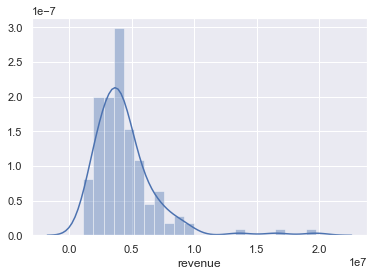

In [9]:
sns.distplot(df_train['revenue'])
print("Skewness: %f" % df_train['revenue'].skew())

As we see, the target variable `revenue` is not normally distributed.
This can reduce the performance of the ML regression models.
Therfore we make log transformation, resulting better distribution model.

Skewness: 0.307402


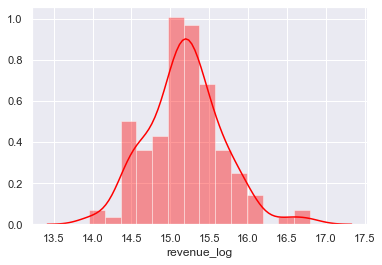

In [10]:
df_train['revenue_log'] = np.log(df_train['revenue'])
sns.distplot(df_train['revenue_log'], color = 'red')
print("Skewness: %f" % df_train['revenue_log'].skew())

In [11]:
# Dropping the old column
df_train.drop('revenue', axis= 1, inplace=True)

### Numerical and Categorical features

In [12]:
# Numerical Data
numerical_data = df_train.dtypes[df_train.dtypes != 'object'].index
print("Numerical data: ", numerical_data)
print("Total Number of Numerical data: ", len(numerical_data))

print('-'*100)

# Categorical Data
categorical_data = df_train.dtypes[df_train.dtypes == 'object'].index
print("Categorical data: ", categorical_data)
print("Total Number of Categorical data: ", len(categorical_data))

Numerical data:  Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue_log'],
      dtype='object')
Total Number of Numerical data:  39
----------------------------------------------------------------------------------------------------
Categorical data:  Index(['Open Date', 'City', 'City Group', 'Type'], dtype='object')
Total Number of Categorical data:  4


In [13]:
df_train[numerical_data].head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue_log
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,3.0,5,3,4,5,5,4,3,4,15.547830
1,1,4,5.0,4.0,4.0,1,2,5,5,5,...,3.0,0,0,0,0,0,0,0,0,15.750379
2,2,2,4.0,2.0,5.0,2,3,5,5,5,...,3.0,0,0,0,0,0,0,0,0,14.535971
3,3,6,4.5,6.0,6.0,4,4,10,8,10,...,7.5,25,12,10,6,18,12,12,6,14.799651
4,4,3,4.0,3.0,4.0,2,2,5,5,5,...,3.0,5,1,3,2,3,4,3,3,15.278005


In [14]:
df_train[categorical_data].head()

,Open Date,City,City Group,Type
0,07/17/1999,Istanbul,Big Cities,IL
1,02/14/2008,Ankara,Big Cities,FC
2,03/09/2013,Diyarbakr,Other,IL
3,02/02/2012,Tokat,Other,IL
4,05/09/2009,Gaziantep,Other,IL


In [15]:
total = df_train.isna().sum().sort_values(ascending = False)
percentage = (df_train.isna().sum() / df_train.isna().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage'])
missing_data.head(10)

,Total,Percentage
revenue_log,0,0.0
P6,0,0.0
P14,0,0.0
P13,0,0.0
P12,0,0.0
P11,0,0.0
P10,0,0.0
P9,0,0.0
P8,0,0.0
P7,0,0.0


There are no missing entries in data.

### Checking for Skewness, Kurtosis

In [16]:
for col in numerical_data:
    print(f'{col:{15}} Skewness: {"%5.2f"%df_train[col].skew():{10}} Kurtosis: {"%5.2f"%df_train[col].kurt():{20}}')

Id              Skewness:  0.00      Kurtosis: -1.20               
P1              Skewness:  1.84      Kurtosis:  2.58               
P2              Skewness:  0.04      Kurtosis:  0.33               
P3              Skewness:  0.15      Kurtosis:  2.57               
P4              Skewness:  1.04      Kurtosis:  1.09               
P5              Skewness:  2.41      Kurtosis:  8.27               
P6              Skewness:  1.56      Kurtosis:  2.07               
P7              Skewness:  0.67      Kurtosis:  0.81               
P8              Skewness:  1.47      Kurtosis:  1.70               
P9              Skewness:  1.73      Kurtosis:  1.66               
P10             Skewness:  1.72      Kurtosis:  1.60               
P11             Skewness:  1.32      Kurtosis:  2.28               
P12             Skewness:  1.40      Kurtosis:  1.48               
P13             Skewness:  1.16      Kurtosis:  1.16               
P14             Skewness:  2.88      Kurtosis:  

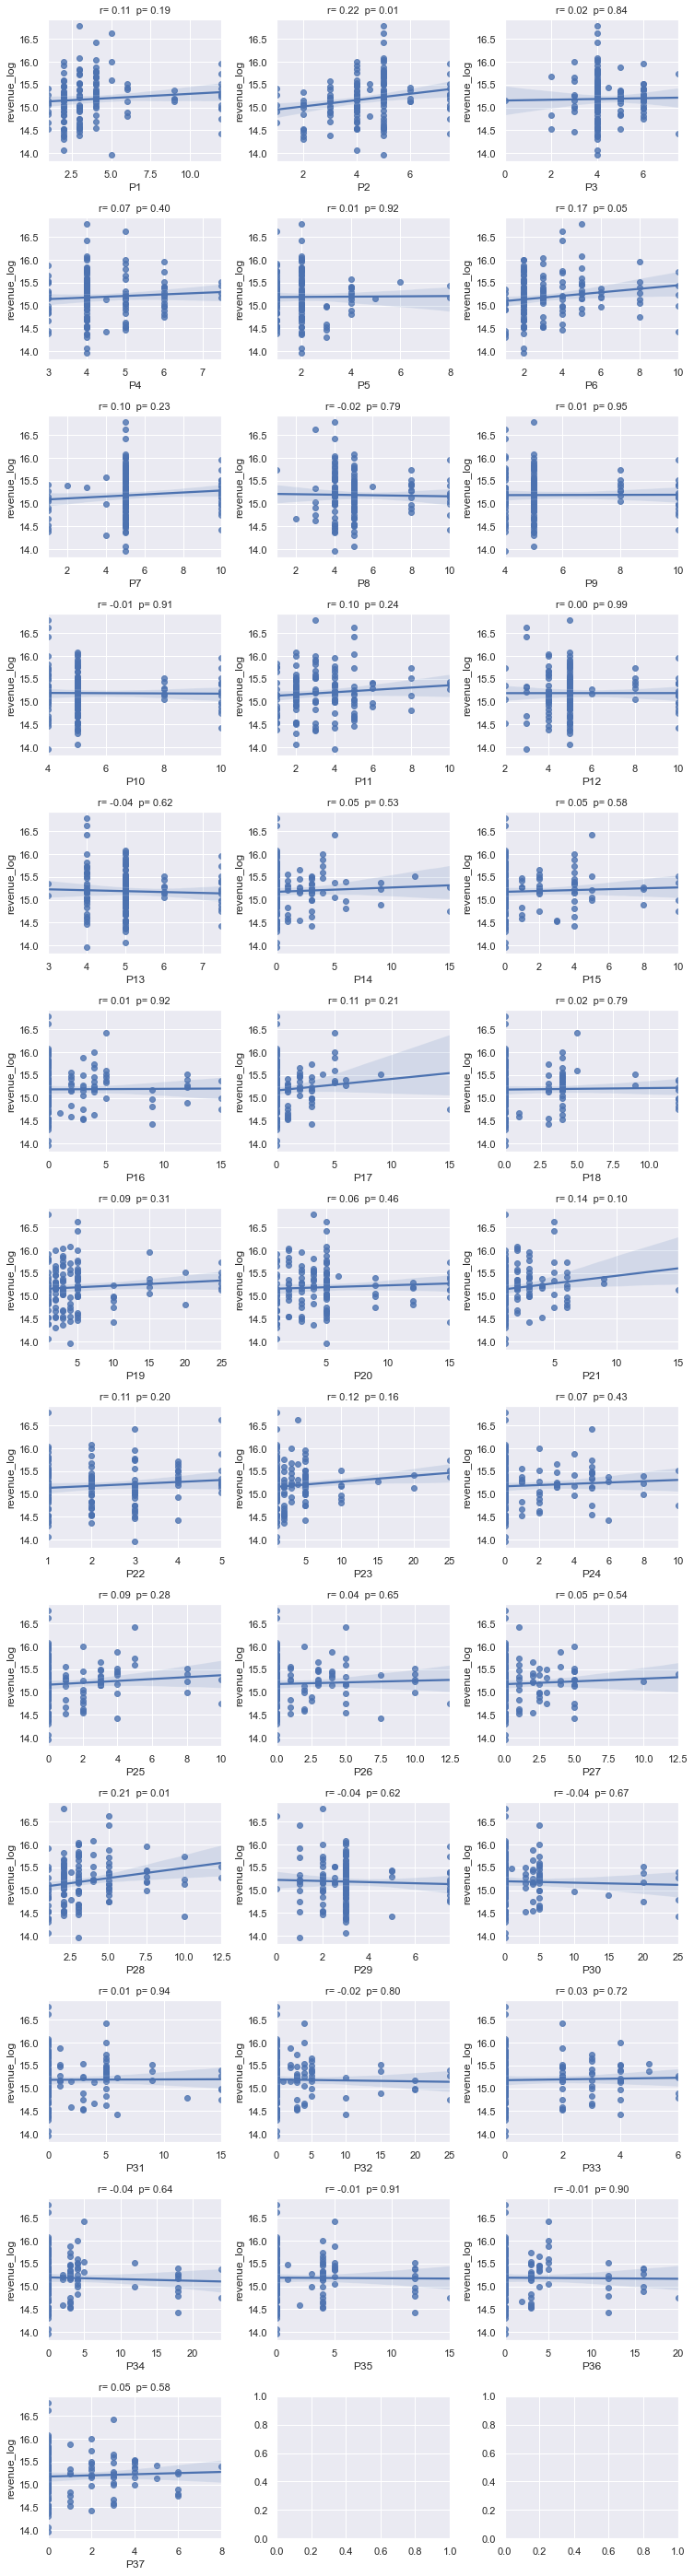

In [23]:
target = 'revenue_log'
no_of_rows = 13
no_of_cols = 3

fig, axs = plt.subplots(no_of_rows, no_of_cols, figsize = (no_of_cols*3.5, no_of_rows*3))

list_numerical_data = list(numerical_data)
list_not_plot = ['Id', 'revenue_log']
list_plot_num_data = [num for num in list_numerical_data if num not in list_not_plot]

for r in range(0, no_of_rows):
    for c in range(0, no_of_cols):
        i = (r * no_of_cols) + c
        if i < len(list_plot_num_data):
            sns.regplot(df_train[list_plot_num_data[i]], df_train[target], ax = axs[r][c])
            stp = stats.pearsonr(df_train[list_plot_num_data[i]], df_train[target])
            title = "r= " + "{0:0.2f}".format(stp[0]) + "  " + "p= " + "{0:0.2f}".format(stp[1])
            axs[r][c].set_title(title, fontsize = 11)
            
plt.tight_layout()
plt.show()